# Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import altair as alt

In [2]:
df = pd.read_csv('BD_PRE.csv', dtype={'G1': str})

C:\Users\filsk\anaconda3\envs\comp\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,IDTNS,TIPO,OPERADORA,ESTADO,DATA,ANO_BASE,Q1,Q2,Q2_1,Q2_2,...,G1,H0,COD_IBGE,H1,H2,H2a,H3,I1,I2,PESO
0,6159652,PRE,CLARO,RS,15/Jul/20,2020,1,NaN,2.0,2.0,...,NaN,CANOAS,4304606.0,3,2000,1,5.0,1,NaN,1.880793
1,6377853,PRE,OI,SP,15/Jul/20,2020,1,NaN,2.0,2.0,...,NaN,SÃO PAULO,3550308.0,1,2000,1,2.0,1,NaN,2.637631
2,6454535,PRE,TIM,MG,15/Jul/20,2020,1,NaN,2.0,2.0,...,NaN,ESMERALDAS,3124104.0,2,999998,98,4.0,1,NaN,2.615088
3,6570392,PRE,VIVO,AC,15/Jul/20,2020,1,NaN,2.0,2.0,...,NaN,RIO BRANCO,1200401.0,1,1040,1,5.0,3,NaN,0.135088
4,6641272,PRE,VIVO,MG,15/Jul/20,2020,1,NaN,2.0,2.0,...,NaN,FORTUNA DE MINAS,3126406.0,2,2000,1,5.0,1,NaN,2.133139


Primeiro, removemos todas as entradas com J1 = 99, ou seja, sem a variável resposta.

In [4]:
df = df.query('J1 != 99')

# Informações estatísticas básicas

In [5]:
df.describe()

,IDTNS,ANO_BASE,Q1,Q2,Q2_1,Q2_2,Q3,Q4,Q5,Q6,...,F5,F6,COD_IBGE,H1,H2,H2a,H3,I1,I2,PESO
count,1.664410e+05,166441.000000,166441.0,147783.000000,18658.0,18658.0,166441.0,166441.0,166441.000000,166441.0,...,96395.000000,24253.000000,6.213900e+04,166441.000000,166441.000000,166441.000000,62139.000000,166441.000000,84299.000000,166441.000000
mean,1.669824e+07,2017.008946,1.0,3.485252,2.0,2.0,1.0,1.0,1.029055,1.0,...,1.748400,5.309529,3.252957e+06,212.929116,248345.818206,113508.475448,8.574229,1.256427,1.179255,1.000226
std,2.058642e+07,1.690221,0.0,2.284802,0.0,0.0,0.0,0.0,0.167962,0.0,...,0.433935,4.818559,1.922400e+06,4554.428895,430354.832670,317199.709710,18.284999,0.513186,0.383568,1.290194
min,3.780000e+02,2015.000000,1.0,2.000000,2.0,2.0,1.0,1.0,1.000000,1.0,...,1.000000,0.000000,9.999000e+03,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,0.013938
25%,4.725778e+06,2015.000000,1.0,2.000000,2.0,2.0,1.0,1.0,1.000000,1.0,...,1.000000,3.000000,2.105302e+06,1.000000,1000.000000,1.000000,4.000000,1.000000,1.000000,0.183445
50%,6.538125e+06,2017.000000,1.0,2.000000,2.0,2.0,1.0,1.0,1.000000,1.0,...,2.000000,5.000000,2.903276e+06,2.000000,1800.000000,2.000000,5.000000,1.000000,1.000000,0.601990
75%,4.012689e+07,2018.000000,1.0,7.000000,2.0,2.0,1.0,1.0,1.000000,1.0,...,2.000000,8.000000,4.201208e+06,3.000000,15000.000000,3.000000,6.000000,1.000000,1.000000,1.362559
max,6.203986e+07,2020.000000,1.0,7.000000,2.0,2.0,1.0,1.0,2.000000,1.0,...,2.000000,99.000000,9.999999e+06,99999.000000,999999.000000,999998.000000,99.000000,3.000000,2.000000,10.965368


# Informações de Identificação

Vamos remover informações de identificação, já que não terão efeito na avaliação do usuário.

Essas informações incluem idade e gênero do respondente, que podem ter efeito na avaliação final, portanto iremos explorar o relacionamento dessas variáveis com a nota J1.

<AxesSubplot:>

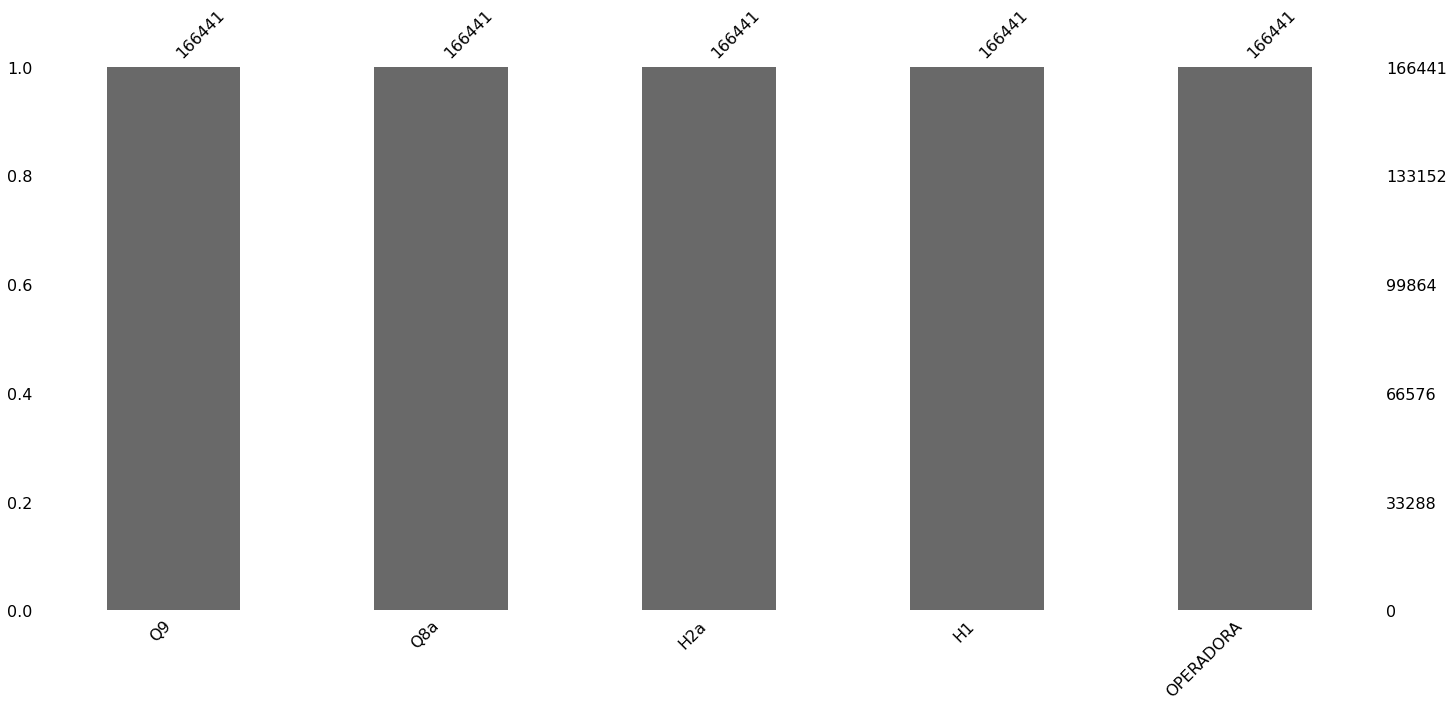

In [6]:
msno.bar(df[['Q9', 'Q8a', 'H2a', 'H1', 'OPERADORA']])

## Gênero

In [7]:
df['Q9'].value_counts()

1    83685
2    82756
Name: Q9, dtype: int64

In [8]:
df['Q9'] = df['Q9'].apply(lambda x: 'Feminino' if x == 1 else 'Masculino')
df['Q9']

0         Masculino
1         Masculino
2         Masculino
3         Masculino
4          Feminino
            ...    
166694     Feminino
166695     Feminino
166696    Masculino
166697     Feminino
166698     Feminino
Name: Q9, Length: 166441, dtype: object

In [9]:
# Comentado para diminuir tamanho do arquivo e melhorar performance.
# Para ver o gráfico, rebuildar todo o projeto.
# PNG a parte na pasta do projeto.

# alt.data_transformers.disable_max_rows()

# alt.Chart(df).mark_bar().encode(
#     x = alt.X('Q9:O', title='Gênero'),
#     y = alt.Y('count(Q9):Q', title='Número de respondentes por gênero'),
#     color = alt.Color('Q9:N', title='Gênero'),
#     column = alt.Column('J1:N', title='Nota de avaliação final')
# )

In [10]:
# alt.Chart(df, width=500).mark_line().encode(
#     x = alt.X('J1:O', title='Nota de avaliação final'),
#     y = alt.Y('count(Q9):Q', title='Número de respondentes por gênero'),
#     color = alt.Color('Q9:N', title='Gênero')
# )

# Outra visualização dos mesmos dados. Escondida para diminuir o tamanho do notebook.

Como podemos ver nestes dois gráficos, não parece que o gênero do respondente afeta muito a avaliação final. Porém, existe uma diferença grande quando a avaliação final é 10. Por isso, se não tivermos um número muito grande de variáveis no modelo, iremos incluir a variável gênero no nosso modelo.

In [11]:
df['genero'] = pd.get_dummies(df['Q9'], drop_first=True)

##  Idade

In [12]:
df['Q8a'].value_counts()

4    32310
7    31664
3    28989
5    24771
8    23909
6    23244
9     1554
Name: Q8a, dtype: int64

In [13]:
def faixa_etaria(id_idade):
    
    dict_faixa = {
        1:'Menor de 16',
        2:	'De 16 a 17 anos',
        3:	'De 18 a 24 anos',
        4:	'De 25 a 30 anos',
        5:	'De 31 a 35 anos',
        6:	'De 36 a 40 anos',
        7:	'De 41 a 50 anos',
        8:	'De 51 a 70 anos',
        9:	'Mais de 70 anos',
        99:	'Recusa'
    }
    
    return dict_faixa[id_idade]

new_q8a = df["Q8a"].apply(faixa_etaria)
new_q8a

0         De 31 a 35 anos
1         De 51 a 70 anos
2         De 18 a 24 anos
3         De 25 a 30 anos
4         De 41 a 50 anos
               ...       
166694    De 25 a 30 anos
166695    De 51 a 70 anos
166696    De 41 a 50 anos
166697    De 25 a 30 anos
166698    De 25 a 30 anos
Name: Q8a, Length: 166441, dtype: object

In [14]:
df["Q8a"] = new_q8a

In [15]:
# Comentado para diminuir tamanho do arquivo e melhorar performance.
# Para ver o gráfico, rebuildar todo o projeto.
# PNG a parte na pasta do projeto.

# alt.Chart(df, width=500).transform_aggregate(
#     media='mean(J1)',
#     mediana='median(J1)',
#     groupby=['Q8a']
# ).transform_fold(
#     ['media', 'mediana'],
#     as_=['Agregados', 'Nota Final']
# ).mark_line().encode(
#     x=alt.X('Q8a', title='Faixa Etária', axis=alt.Axis(labelAngle=45)),
#     y='Nota Final:Q', 
#     color='Agregados:N',
# )

Como podemos ver, tanto a média quanto a mediana da nota final para cada faixa etária sofrem pouca variação. Portanto, podemos remover a coluna Q8a.

## 3.3 Renda

### 3.3.1 Renda em salários mínimos

A informação de renda dos respondentes está armazenada na coluna H2a, que tem valores diferentes para anos diferentes da pesquisa. Vamos transformar os valores na média da faixa de renda (por exemplo 3 para a faixa de renda 2 a 4 salários mínimos). Também substituimos os valores faltantes pela média de renda daquele ano.

In [16]:
df['H2a'].value_counts()

1         77439
2         35620
999998    18891
3         13601
99         7700
98         5255
4          4503
5          3432
Name: H2a, dtype: int64

In [17]:
def map_renda(ano, renda):
    
    dict_2015 = {
        1:	0.5,
        2:	1.5,
        3:	3.5,
        4:	5,
        5:	8,
        6:	10,
        999998: 0,
        98: 0,
        99:	0,
        99999: 0
    }
    
    dict_2016 = {
        1:	1,
        2:	3,
        3:	5,
        4:	8,
        5:	10,
        999998: 0,
        99:	0,
        99999: 0
    }
    
    dict_2017_20 = {
        1:	1,
        2:	3,
        3:	5,
        4:	8,
        5:	10,
        97: 0,
        98: 0,
        999998: 0,
        99:	0,
        999999: 0
    }
    
    if ano == 2015:
        return dict_2015[renda]
    elif ano == 2016:
        return dict_2016[renda]
    else:
        return dict_2017_20[renda]
    
df['renda'] = list(map(map_renda, df["ANO_BASE"], df["H2a"]))

In [18]:
renda_2015 = df.query('ANO_BASE == 2015')['renda']
renda_2015

122729    0.5
122730    0.5
122731    0.5
122732    1.5
122733    1.5
         ... 
166694    0.0
166695    3.5
166696    1.5
166697    0.0
166698    0.5
Name: renda, Length: 43899, dtype: float64

In [19]:
renda_2015_mean = renda_2015.where(renda_2015 != 0).describe()['mean']
renda_2015_mean

2.1758553776788516

In [20]:
renda_2016 = df.query('ANO_BASE == 2016')['renda']
renda_2016

92927     1.0
92928     0.0
92929     0.0
92930     3.0
92931     3.0
         ... 
122724    8.0
122725    3.0
122726    1.0
122727    3.0
122728    3.0
Name: renda, Length: 29753, dtype: float64

In [21]:
renda_2016_mean = renda_2016.where(renda_2016 != 0).describe()['mean']
renda_2016_mean

2.09215702686867

In [22]:
renda_2017_20 = df.query('ANO_BASE in [2017, 2018, 2019, 2020]')['renda']
renda_2017_20

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
92922    1.0
92923    1.0
92924    3.0
92925    1.0
92926    1.0
Name: renda, Length: 92789, dtype: float64

In [23]:
renda_2017_20_mean = renda_2017_20.where(renda_2017_20 != 0).describe()['mean']
renda_2017_20_mean

1.9881968859869412

In [24]:
def map_renda_mean(ano, renda):
    
    if renda == 0:
        if ano == 2015:
            return renda_2015_mean
        elif ano == 2016:
            return renda_2016_mean
        else:
            return renda_2017_20_mean
    else:
        return renda

df["renda"] = list(map(map_renda_mean, df["ANO_BASE"], df["renda"]))

In [25]:
df['renda'].value_counts()

1.000000     67161
3.000000     22274
1.988197     17131
1.500000     13346
0.500000     10278
2.175855      8856
5.000000      7734
3.500000      7715
2.092157      5859
8.000000      4511
10.000000     1576
Name: renda, dtype: int64

In [26]:
renda_groupby = df[['renda', 'J1']].groupby(['renda'], as_index=False).mean()

alt.Chart(renda_groupby).mark_line().encode(
    x = alt.X('renda', title='Renda (em salários mínimos)'),
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'renda']
).properties(
    title = 'Média de J1 por renda'
).interactive()

alt.Chart(...)

### 3.3.2 Residentes que contribuem com a renda

Limpamos a coluna H1 - informação sobre o número de contribuintes para a renda total - para lidar com respondentes que se recusaram a dar essa informação. Também substituimos pela média total da coluna.

In [27]:
df['H1'].value_counts()

2        67465
1        55175
3        21366
4         9696
99        5087
5         4411
6         1373
7          520
8          467
99999      346
10         241
9           93
12          58
20          50
15          25
13          24
11          21
14          14
17           4
16           2
18           2
19           1
Name: H1, dtype: int64

In [28]:
df['H1'] = df['H1'].apply(lambda x: -1 if x == 99 else (-1 if x == 99999 else x))
df['H1']

0         3
1         1
2         2
3         1
4         2
         ..
166694    1
166695    4
166696    3
166697    1
166698    2
Name: H1, Length: 166441, dtype: int64

In [29]:
h1_mean = df.query('H1 != -1')['H1'].describe()['mean']
h1_mean

2.0922438636589487

In [30]:
df['contribuintes_renda'] = df['H1'].apply(lambda x: 2 if x == -1 else x)
df['contribuintes_renda']

0         3
1         1
2         2
3         1
4         2
         ..
166694    1
166695    4
166696    3
166697    1
166698    2
Name: contribuintes_renda, Length: 166441, dtype: int64

In [31]:
h1_groupby = df[['contribuintes_renda', 'J1']].groupby(['contribuintes_renda'], as_index=False).mean()

alt.Chart(h1_groupby).mark_line().encode(
    x = alt.X('contribuintes_renda', title='Contribuintes para renda'),
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'contribuintes_renda']
).properties(
    title = 'Média de J1 por número de contribuintes para renda'
).interactive()

alt.Chart(...)

## 3.4 Operadora

A informação de operadora do usuário está codificada como uma string. Precisamos transformar em variáveis dummy para serem usadas como valores numéricos.

In [32]:
df['OPERADORA'].value_counts()

OI           40600
VIVO         40463
CLARO        39510
TIM          39262
ALGAR         4404
SERCOMTEL     1418
NEXTEL         784
Name: OPERADORA, dtype: int64

In [33]:
operadora_groupby = df[['OPERADORA', 'J1']].groupby(['OPERADORA'], as_index=False).mean()

alt.Chart(h1_groupby).mark_bar().encode(
    x = alt.X('OPERADORA', title='Operadora'),
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'OPERADORA']
).properties(
    title = 'Média de J1 por operadora'
).interactive()

ValueError: OPERADORA encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [34]:
operadora = pd.get_dummies(df['OPERADORA'], drop_first=True)
operadora

,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
166694,0,0,0,1,0,0
166695,0,0,0,1,0,0
166696,0,0,0,1,0,0
166697,0,0,0,1,0,0


In [35]:
df = pd.concat([df, operadora], axis = 1)
df

,IDTNS,TIPO,OPERADORA,ESTADO,DATA,ANO_BASE,Q1,Q2,Q2_1,Q2_2,...,PESO,genero,renda,contribuintes_renda,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
0,6159652,PRE,CLARO,RS,15/Jul/20,2020,1,NaN,2.0,2.0,...,1.880793,1,1.000000,3,1,0,0,0,0,0
1,6377853,PRE,OI,SP,15/Jul/20,2020,1,NaN,2.0,2.0,...,2.637631,1,1.000000,1,0,0,1,0,0,0
2,6454535,PRE,TIM,MG,15/Jul/20,2020,1,NaN,2.0,2.0,...,2.615088,1,1.988197,2,0,0,0,0,1,0
3,6570392,PRE,VIVO,AC,15/Jul/20,2020,1,NaN,2.0,2.0,...,0.135088,1,1.000000,1,0,0,0,0,0,1
4,6641272,PRE,VIVO,MG,15/Jul/20,2020,1,NaN,2.0,2.0,...,2.133139,0,1.000000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166694,40897361,PRE,SERCOMTEL,PR,15/Dec/15,2015,1,7.0,NaN,NaN,...,0.026012,0,2.175855,1,0,0,0,1,0,0
166695,40897479,PRE,SERCOMTEL,PR,15/Dec/15,2015,1,7.0,NaN,NaN,...,0.026012,0,3.500000,4,0,0,0,1,0,0
166696,40897581,PRE,SERCOMTEL,PR,15/Dec/15,2015,1,7.0,NaN,NaN,...,0.026012,1,1.500000,3,0,0,0,1,0,0
166697,40898480,PRE,SERCOMTEL,PR,15/Dec/15,2015,1,7.0,NaN,NaN,...,0.026012,0,2.175855,1,0,0,0,1,0,0


# Remover informações desnecessárias

Removemos as informações de identificação, localizadas nas colunas Q1-Q9 (coluna Q9 recriada como coluna dummy gênero), OPERADORA, ESTADO, H0 e COD_IBGE.

Também removemos a coluna TIPO, já que é a mesma para todos os usuários entrevistados, e as colunas de informação da pesquisa: IDTNS, DATA, ANO_BASE, I1, I2 e PESO.

Por fim, removemos as colunas H1, H2 e H2a, já que foram recriadas nas colunas de renda.

In [36]:
df = df.drop(columns = ['Q1', 'Q2', 'Q2_1', 'Q2_2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q8a', 'Q9', 
                        'OPERADORA', 'ESTADO', 'H0', 'COD_IBGE', 
                        'TIPO', 'IDTNS', 'DATA', 'ANO_BASE', 'I1', 'I2', 'PESO', 'G1',
                        'H1', 'H2', 'H2a', 'H3'])

In [37]:
df

,J1,B1_1,B1_2,C1_1,C1_2,D1,D2_1,D2_2,D2_3,E1_1,...,F6,genero,renda,contribuintes_renda,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
0,4,7,7,10,10,1,4.0,6.0,5.0,8,...,NaN,1,1.000000,3,1,0,0,0,0,0
1,10,10,10,10,10,2,NaN,NaN,NaN,10,...,NaN,1,1.000000,1,0,0,1,0,0,0
2,10,10,10,7,8,1,4.0,9.0,5.0,8,...,NaN,1,1.988197,2,0,0,0,0,1,0
3,10,10,10,10,10,1,10.0,10.0,10.0,10,...,NaN,1,1.000000,1,0,0,0,0,0,1
4,9,10,10,0,0,1,6.0,5.0,6.0,10,...,NaN,0,1.000000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166694,10,10,10,8,8,1,10.0,10.0,8.0,8,...,NaN,0,2.175855,1,0,0,0,1,0,0
166695,10,10,10,10,10,2,NaN,NaN,NaN,10,...,NaN,0,3.500000,4,0,0,0,1,0,0
166696,7,8,8,6,6,2,NaN,NaN,NaN,8,...,NaN,1,1.500000,3,0,0,0,1,0,0
166697,8,5,4,8,8,1,8.0,6.0,5.0,6,...,NaN,0,2.175855,1,0,0,0,1,0,0


# Missing data para notas

<AxesSubplot:>

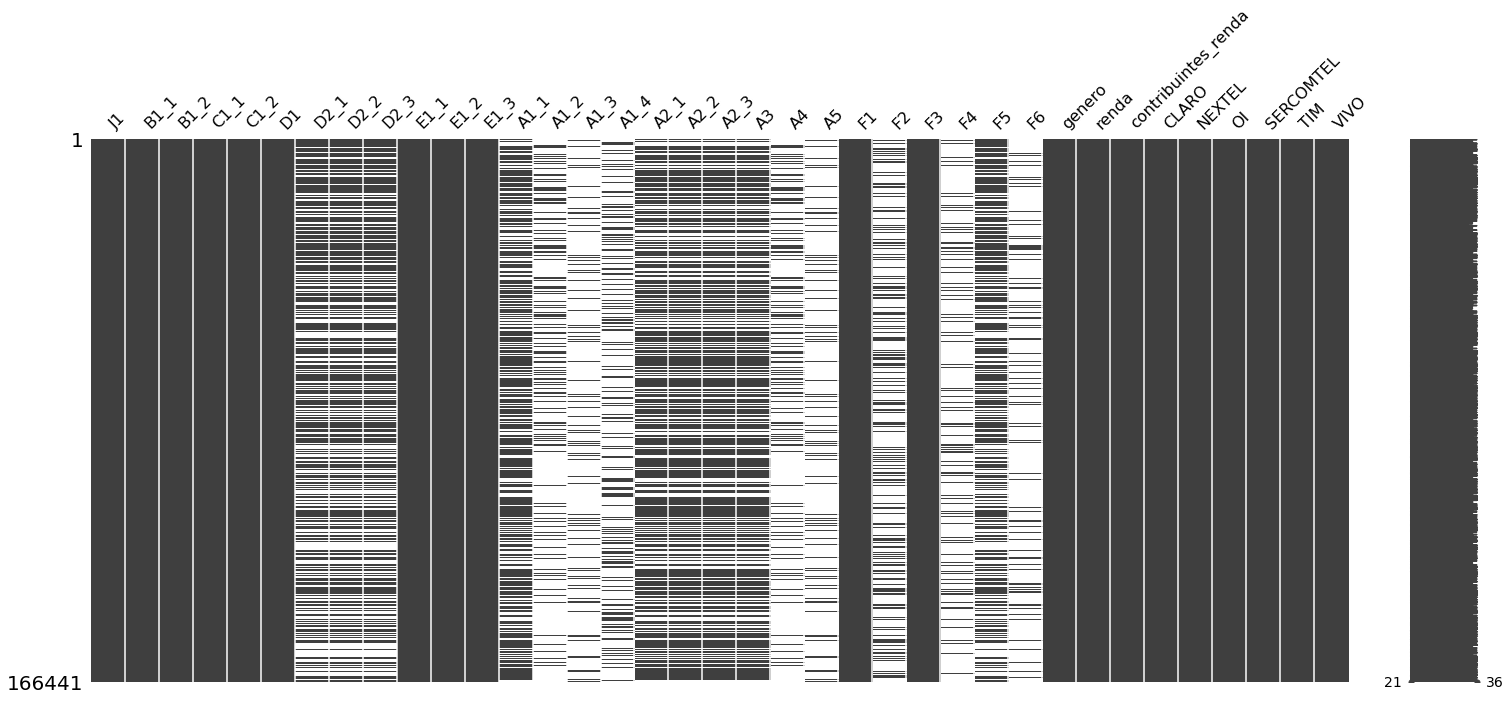

In [38]:
msno.matrix(df)

<AxesSubplot:>

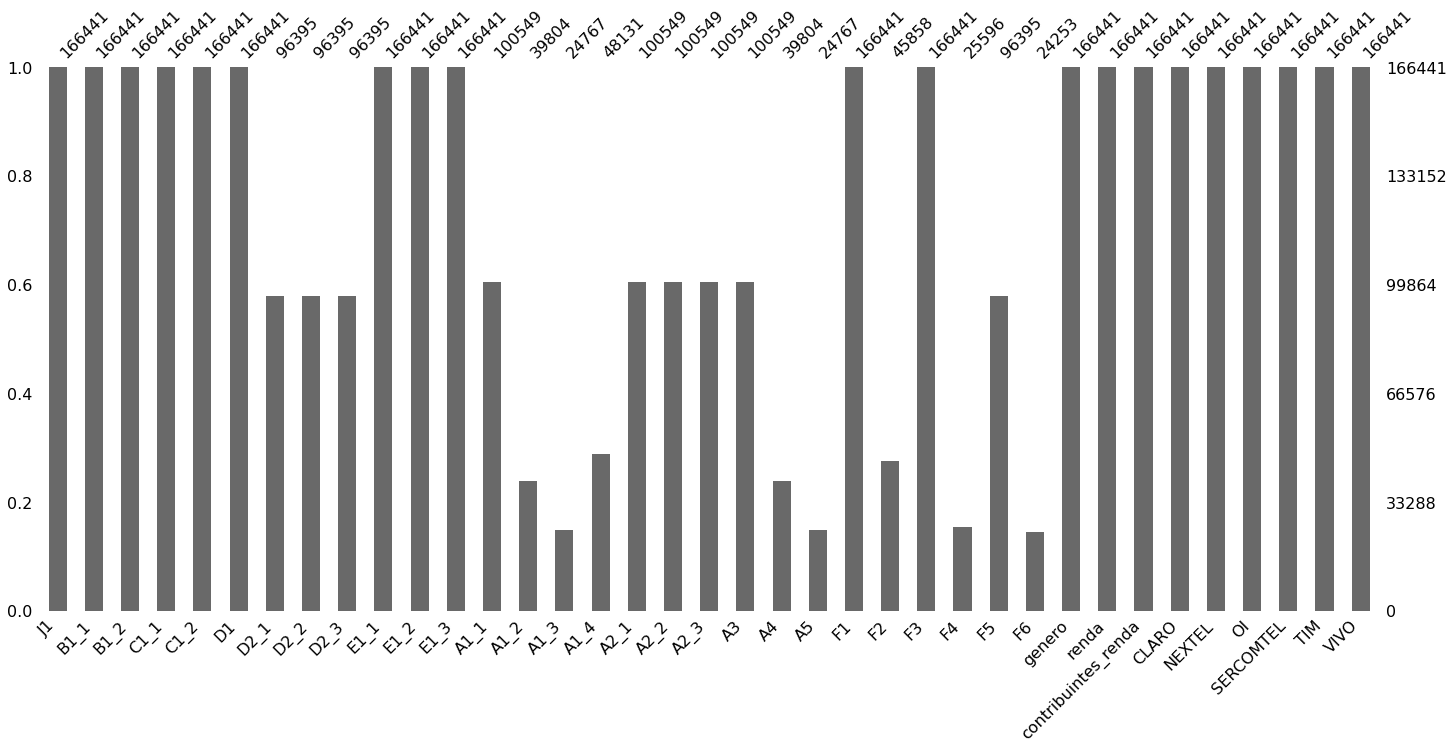

In [39]:
msno.bar(df)

Vamos explorar as colunas com missing data para decidir se devemos substituir as informações ou descartar a coluna.

## Colunas A

### Colunas A1

As colunas A1 contém informações sobre a utilização dos usuários aos canais de atendimento.

Contém um número para sim e NaN para não.

Vamos mudar as respostas sim para 1 e não para 0.

In [40]:
df[['A1_1', 'A1_2', 'A1_3', 'A1_4']]

,A1_1,A1_2,A1_3,A1_4
0,1.0,NaN,NaN,NaN
1,1.0,2.0,3.0,NaN
2,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,97.0
4,1.0,2.0,NaN,NaN
...,...,...,...,...
166694,NaN,NaN,3.0,NaN
166695,1.0,NaN,NaN,NaN
166696,NaN,NaN,NaN,97.0
166697,1.0,NaN,NaN,NaN


<AxesSubplot:>

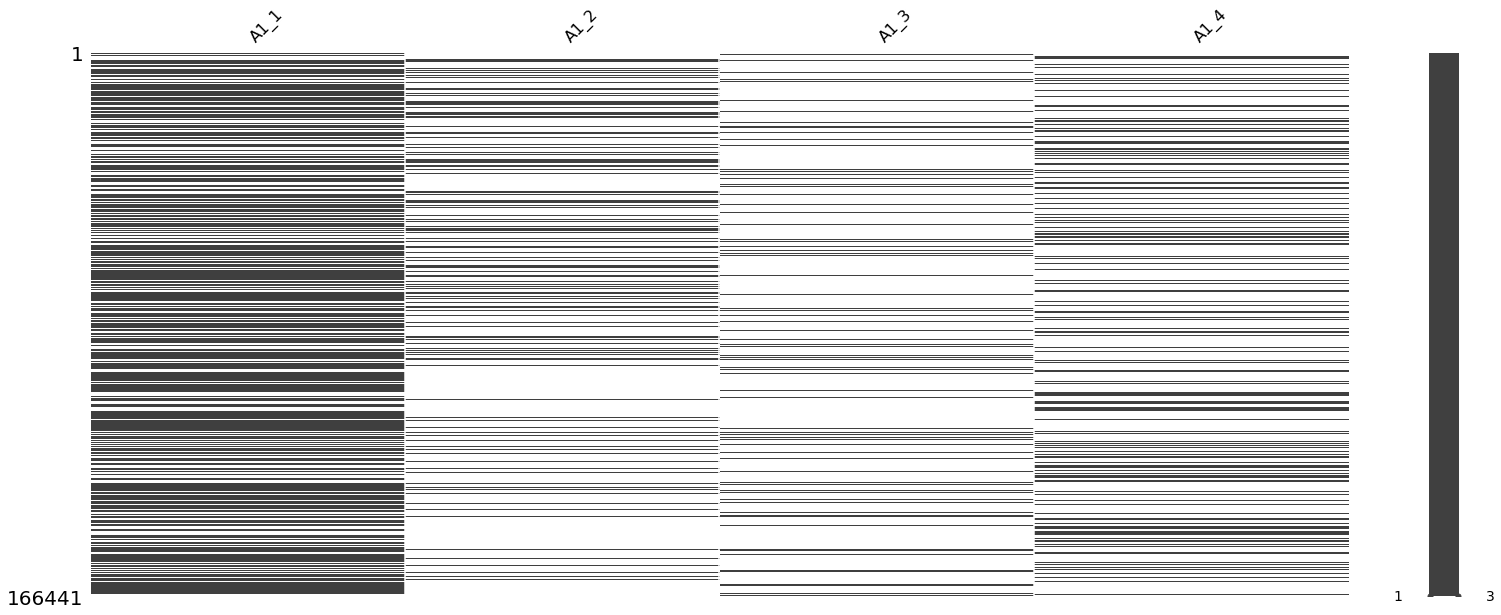

In [41]:
msno.matrix(df[['A1_1', 'A1_2', 'A1_3', 'A1_4']])

<AxesSubplot:>

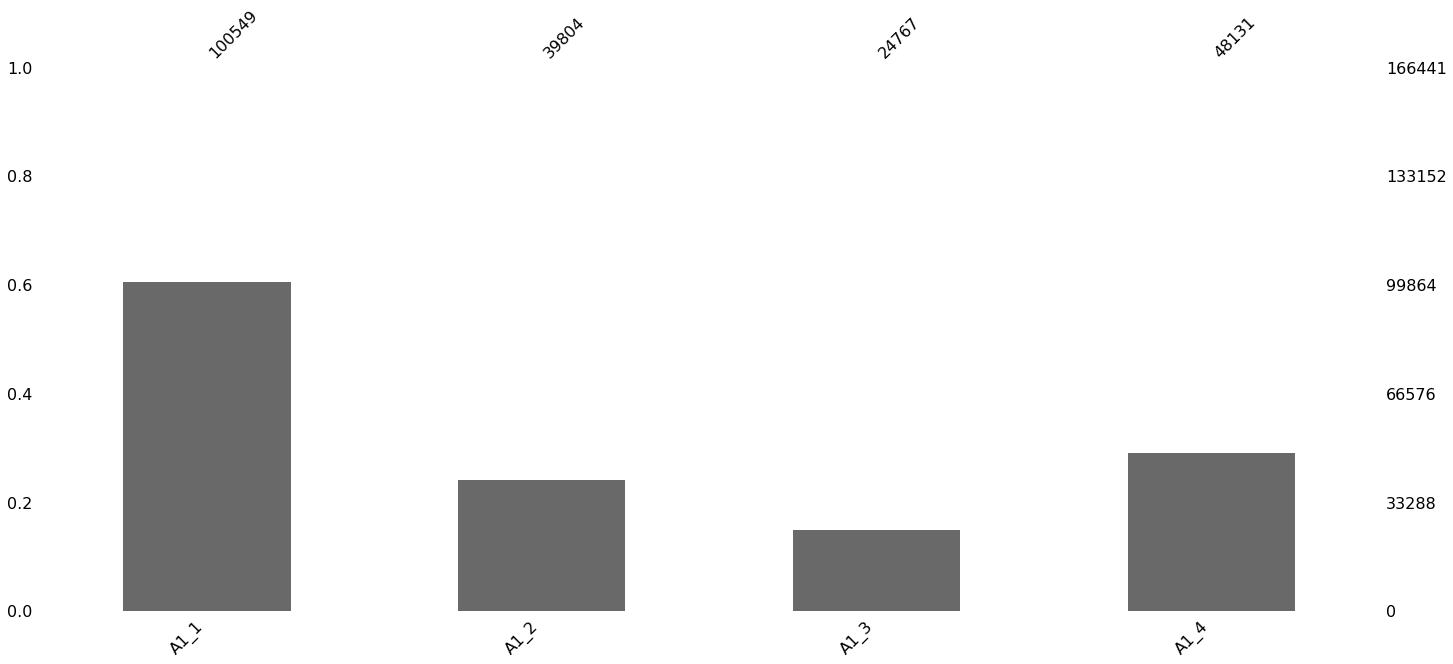

In [42]:
msno.bar(df[['A1_1', 'A1_2', 'A1_3', 'A1_4']])

In [43]:
df['A1_1'] = df['A1_1'].apply(lambda x: 1 if x == 1 else 0)
df['A1_2'] = df['A1_2'].apply(lambda x: 1 if x == 2 else 0)
df['A1_3'] = df['A1_3'].apply(lambda x: 1 if x == 3 else 0)
df['A1_4'] = df['A1_4'].apply(lambda x: 1 if x == 97 else 0)

df[['A1_1', 'A1_2', 'A1_3', 'A1_4']]

,A1_1,A1_2,A1_3,A1_4
0,1,0,0,0
1,1,1,1,0
2,1,0,0,0
3,0,0,0,1
4,1,1,0,0
...,...,...,...,...
166694,0,0,1,0
166695,1,0,0,0
166696,0,0,0,1
166697,1,0,0,0


### Colunas A2-A5

As colunas A2-A5 contém notas atribuídas à qualidade dos diversos canais de atendimento. As entradas com missing data são referentes a usuários que não utilizaram esses canais nos 6 meses anteriores a pesquisa (perguntas A1).

Para elas, iremos substituir os dados faltantes com a nota média da coluna, assim como fizemos para as colunas D.

<AxesSubplot:>

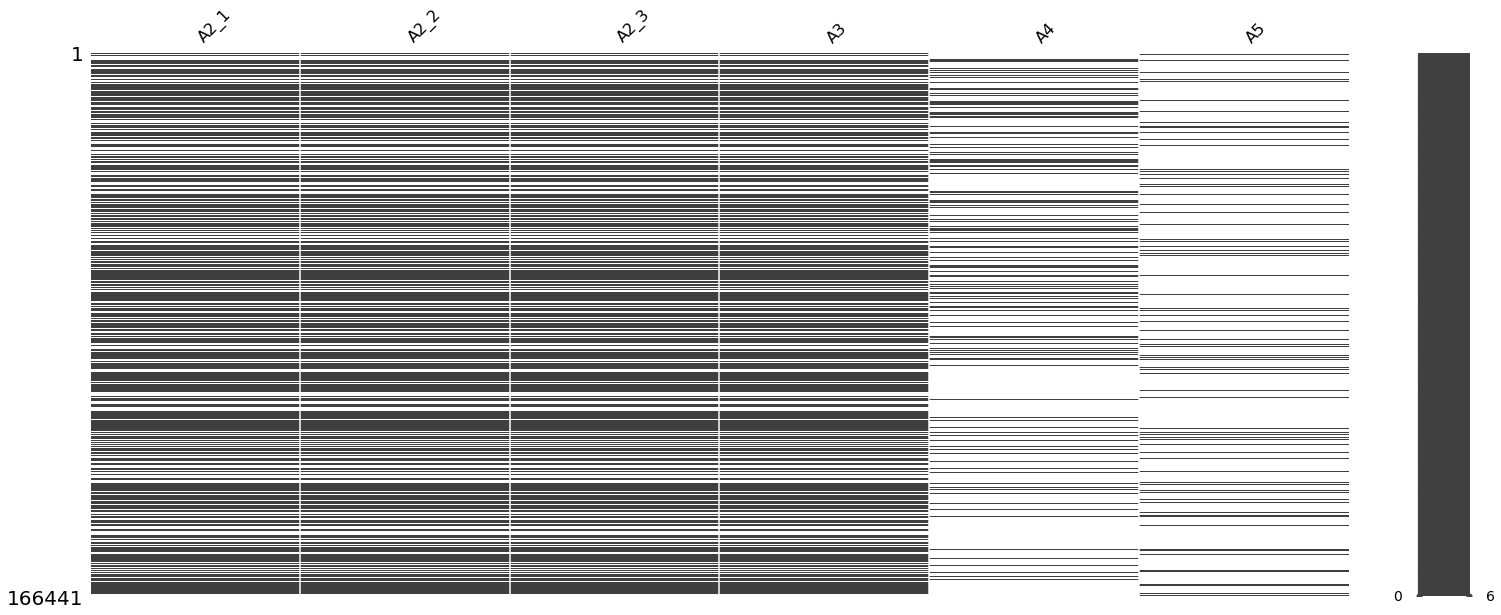

In [44]:
msno.matrix(df[['A2_1', 'A2_2', 'A2_3', 'A3', 'A4', 'A5']])

<AxesSubplot:>

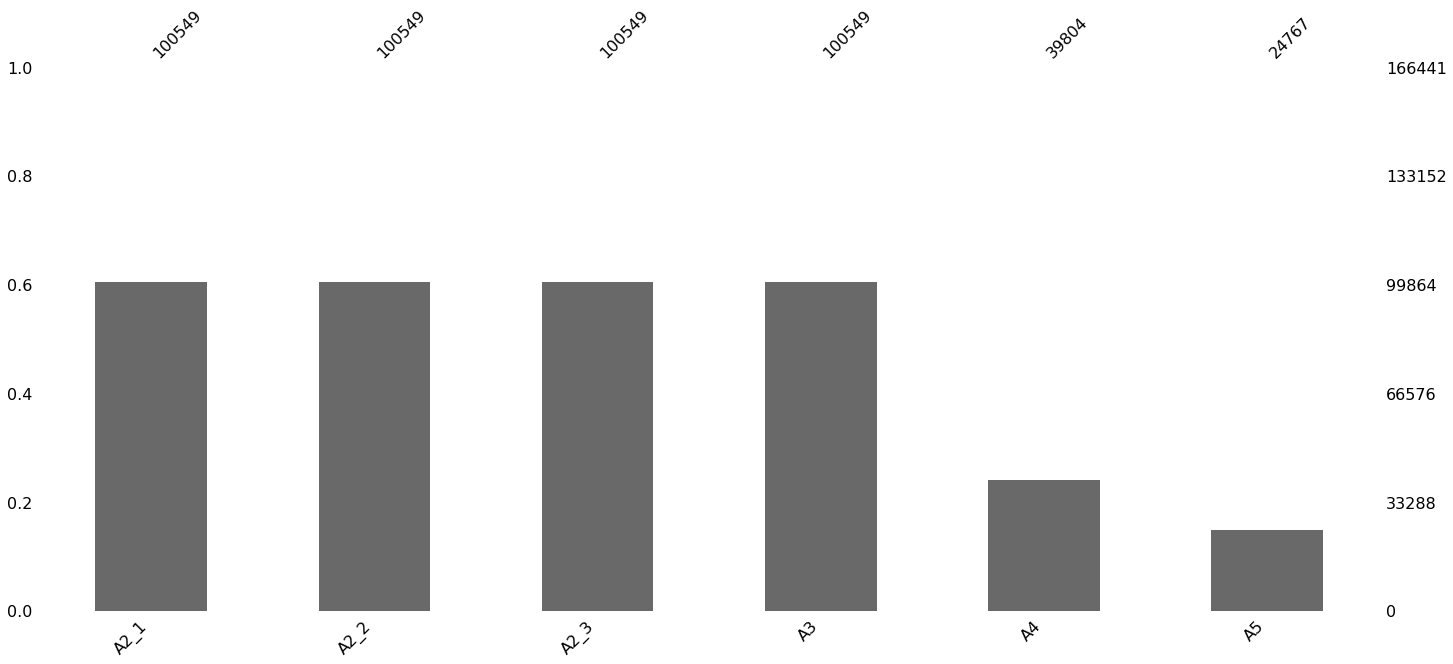

In [45]:
msno.bar(df[['A2_1', 'A2_2', 'A2_3', 'A3', 'A4', 'A5']])

As colunas A4 e A5 contém mais de 50% de missing data, portanto vamos removê-la.

In [46]:
df = df.drop(columns=['A4', 'A5'])

In [47]:
df.head()

,J1,B1_1,B1_2,C1_1,C1_2,D1,D2_1,D2_2,D2_3,E1_1,...,F6,genero,renda,contribuintes_renda,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
0,4,7,7,10,10,1,4.0,6.0,5.0,8,...,NaN,1,1.000000,3,1,0,0,0,0,0
1,10,10,10,10,10,2,NaN,NaN,NaN,10,...,NaN,1,1.000000,1,0,0,1,0,0,0
2,10,10,10,7,8,1,4.0,9.0,5.0,8,...,NaN,1,1.988197,2,0,0,0,0,1,0
3,10,10,10,10,10,1,10.0,10.0,10.0,10,...,NaN,1,1.000000,1,0,0,0,0,0,1
4,9,10,10,0,0,1,6.0,5.0,6.0,10,...,NaN,0,1.000000,2,0,0,0,0,0,1


#### A2_1

In [48]:
df['A2_1'].value_counts()

0.0     18650
10.0    14568
5.0     13389
8.0     12881
7.0     10028
6.0      7076
9.0      6314
2.0      5016
4.0      4995
3.0      4790
1.0      2474
99.0      368
Name: A2_1, dtype: int64

In [49]:
df['A2_1'].isnull().value_counts() #O resultado será o mesmo para as outras colunas A2 e A3

False    100549
True      65892
Name: A2_1, dtype: int64

In [50]:
df.query('A2_1 != 99')['A2_1'].describe()

count    100181.000000
mean          5.310458
std           3.452062
min           0.000000
25%           2.000000
50%           6.000000
75%           8.000000
max          10.000000
Name: A2_1, dtype: float64

In [51]:
a2_1_mean = df.query('A2_1 != 99')['A2_1'].describe()['mean']
a2_1_filled = df['A2_1'].fillna(a2_1_mean)
a2_1_filled = a2_1_filled.apply(lambda x: a2_1_mean if x == 99 else x)
a2_1_filled

0          7.000000
1         10.000000
2          8.000000
3          5.310458
4          5.000000
            ...    
166694     5.310458
166695    10.000000
166696     5.310458
166697     1.000000
166698     5.310458
Name: A2_1, Length: 166441, dtype: float64

In [52]:
df['A2_1'] = a2_1_filled
df['A2_1'].describe()

count    166441.000000
mean          5.310458
std           2.678183
min           0.000000
25%           5.000000
50%           5.310458
75%           7.000000
max          10.000000
Name: A2_1, dtype: float64

In [53]:
a2_1_groupby = df.groupby(['A2_1'], as_index=False).mean()

alt.Chart(a2_1_groupby).mark_line().encode(
    x = 'A2_1',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'A2_1']
).properties(
    title = 'Média de J1 por nota A2_1'
).interactive()

alt.Chart(...)

####  A2_2

In [54]:
df['A2_2'].value_counts()

10.0    18894
8.0     16862
5.0     13431
7.0     11881
0.0     10621
9.0      7991
6.0      7611
4.0      4026
3.0      3849
2.0      3404
1.0      1277
99.0      702
Name: A2_2, dtype: int64

In [55]:
df.query('A2_2 != 99')['A2_2'].describe()

count    99847.000000
mean         6.284405
std          3.130345
min          0.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: A2_2, dtype: float64

In [56]:
a2_2_mean = df.query('A2_2 != 99')['A2_2'].describe()['mean']
a2_2_filled = df['A2_2'].fillna(a2_2_mean)
a2_2_filled = a2_2_filled.apply(lambda x: a2_2_mean if x == 99 else x)
a2_2_filled

0          8.000000
1         10.000000
2          9.000000
3          6.284405
4         10.000000
            ...    
166694     6.284405
166695     8.000000
166696     6.284405
166697     2.000000
166698     6.284405
Name: A2_2, Length: 166441, dtype: float64

In [57]:
df['A2_2'] = a2_2_filled
df['A2_2'].describe()

count    166441.000000
mean          6.284405
std           2.424536
min           0.000000
25%           6.000000
50%           6.284405
75%           8.000000
max          10.000000
Name: A2_2, dtype: float64

In [58]:
a2_2_groupby = df.groupby(['A2_2'], as_index=False).mean()

alt.Chart(a2_2_groupby).mark_line().encode(
    x = 'A2_2',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'A2_2']
).properties(
    title = 'Média de J1 por nota A2_2'
).interactive()

alt.Chart(...)

#### A2_3

In [59]:
df['A2_3'].value_counts()

10.0    29114
8.0     17047
9.0     10730
7.0     10694
5.0     10193
0.0      6578
6.0      6021
4.0      3149
3.0      2942
2.0      2637
1.0      1084
99.0      360
Name: A2_3, dtype: int64

In [60]:
df.query('A2_3 != 99')['A2_3'].describe()

count    100189.000000
mean          7.124684
std           2.946659
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: A2_3, dtype: float64

In [61]:
a2_3_mean = df.query('A2_3 != 99')['A2_3'].describe()['mean']
a2_3_filled = df['A2_3'].fillna(a2_3_mean)
a2_3_filled = a2_3_filled.apply(lambda x: a2_3_mean if x == 99 else x)
a2_3_filled

0          8.000000
1         10.000000
2         10.000000
3          7.124684
4         10.000000
            ...    
166694     7.124684
166695    10.000000
166696     7.124684
166697     9.000000
166698     7.124684
Name: A2_3, Length: 166441, dtype: float64

In [62]:
df['A2_3'] = a2_3_filled
df['A2_3'].describe()

count    166441.000000
mean          7.124684
std           2.286172
min           0.000000
25%           7.000000
50%           7.124684
75%           8.000000
max          10.000000
Name: A2_3, dtype: float64

In [63]:
a2_3_groupby = df.groupby(['A2_3'], as_index=False).mean()

alt.Chart(a2_3_groupby).mark_line().encode(
    x = 'A2_3',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'A2_3']
).properties(
    title = 'Média de J1 por nota A2_3'
).interactive()

alt.Chart(...)

#### A3

In [64]:
df['A3'].value_counts()

10.0    27251
8.0     17340
9.0     11009
7.0     10871
5.0     10798
0.0      6803
6.0      6584
4.0      3124
3.0      2981
2.0      2548
1.0      1103
99.0      137
Name: A3, dtype: int64

In [65]:
df.query('A3 != 99')['A3'].describe()

count    100412.000000
mean          7.046369
std           2.941439
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: A3, dtype: float64

In [66]:
a3_mean = df.query('A3 != 99')['A3'].describe()['mean']
a3_filled = df['A3'].fillna(a3_mean)
a3_filled = a3_filled.apply(lambda x: a3_mean if x == 99 else x)
a3_filled

0          7.000000
1         10.000000
2          9.000000
3          7.046369
4         10.000000
            ...    
166694     7.046369
166695    10.000000
166696     7.046369
166697     8.000000
166698     7.046369
Name: A3, Length: 166441, dtype: float64

In [67]:
df['A3'] = a3_filled
df['A3'].describe()

count    166441.000000
mean          7.046369
std           2.284660
min           0.000000
25%           7.000000
50%           7.046369
75%           8.000000
max          10.000000
Name: A3, dtype: float64

In [68]:
a3_groupby = df.groupby(['A3'], as_index=False).mean()

alt.Chart(a3_groupby).mark_line().encode(
    x = 'A3',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'A3']
).properties(
    title = 'Média de J1 por nota A3'
).interactive()

alt.Chart(...)

## Colunas B1

As colunas B1 não contém valores nulos, mas contém missing data codificadas como 99.

### B1_1

In [69]:
df['B1_1'].value_counts()

10    40620
8     31719
7     22241
5     20185
9     16707
6     12215
0      8128
4      5090
3      4155
2      3185
99     1118
1      1078
Name: B1_1, dtype: int64

In [70]:
df.query('B1_1 != 99')['B1_1'].describe()

count    165323.000000
mean          7.140507
std           2.674809
min           0.000000
25%           5.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: B1_1, dtype: float64

In [71]:
b1_1_mean = df.query('B1_1 != 99')['B1_1'].describe()['mean']
b1_1 = df['B1_1']
b1_1 = b1_1.apply(lambda x: b1_1_mean if x == 99 else x)
b1_1

0          7.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
166694    10.0
166695    10.0
166696     8.0
166697     5.0
166698     9.0
Name: B1_1, Length: 166441, dtype: float64

In [72]:
df['B1_1'] = b1_1
df['B1_1'].describe()

count    166441.000000
mean          7.140507
std           2.665810
min           0.000000
25%           5.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: B1_1, dtype: float64

In [73]:
b1_1_groupby = df.groupby(['B1_1'], as_index=False).mean()

alt.Chart(b1_1_groupby).mark_line().encode(
    x = 'B1_1',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'B1_1']
).properties(
    title = 'Média de J1 por nota B1_1'
).interactive()

alt.Chart(...)

### B1_2

In [74]:
df['B1_2'].value_counts()

10    38943
8     29846
7     21695
5     21020
9     15763
6     12088
0     10875
4      5483
3      4513
2      3547
99     1406
1      1262
Name: B1_2, dtype: int64

In [75]:
df.query('B1_2 != 99')['B1_2'].describe()

count    165035.000000
mean          6.928136
std           2.835879
min           0.000000
25%           5.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: B1_2, dtype: float64

In [76]:
b1_2_mean = df.query('B1_2 != 99')['B1_2'].describe()['mean']
b1_2 = df['B1_2']
b1_2 = b1_2.apply(lambda x: b1_2_mean if x == 99 else x)
b1_2

0          7.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
166694    10.0
166695    10.0
166696     8.0
166697     4.0
166698    10.0
Name: B1_2, Length: 166441, dtype: float64

In [77]:
df['B1_2'] = b1_2
df['B1_2'].describe()

count    166441.000000
mean          6.928136
std           2.823875
min           0.000000
25%           5.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: B1_2, dtype: float64

In [78]:
b1_2_groupby = df.groupby(['B1_2'], as_index=False).mean()

alt.Chart(b1_2_groupby).mark_line().encode(
    x = 'B1_2',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'B1_2']
).properties(
    title = 'Média de J1 por nota B1_2'
).interactive()

alt.Chart(...)

## Colunas C1

As colunas C1 não contém valores nulos, mas contém missing data codificadas como 99.

### C1_1

In [79]:
df['C1_1'].value_counts()

10    60935
8     28871
9     22999
7     16123
5     13207
6      8300
0      4714
4      4088
3      3352
2      2586
1      1086
99      180
Name: C1_1, dtype: int64

In [80]:
df.query('C1_1 != 99')['C1_1'].describe()

count    166261.000000
mean          7.871184
std           2.488250
min           0.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: C1_1, dtype: float64

In [81]:
c1_1_mean = df.query('C1_1 != 99')['C1_1'].describe()['mean']
c1_1 = df['C1_1']
c1_1 = c1_1.apply(lambda x: c1_1_mean if x == 99 else x)
c1_1

0         10.0
1         10.0
2          7.0
3         10.0
4          0.0
          ... 
166694     8.0
166695    10.0
166696     6.0
166697     8.0
166698     8.0
Name: C1_1, Length: 166441, dtype: float64

In [82]:
df['C1_1'] = c1_1
df['C1_1'].describe()

count    166441.000000
mean          7.871184
std           2.486904
min           0.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: C1_1, dtype: float64

In [83]:
c1_1_groupby = df.groupby(['C1_1'], as_index=False).mean()

alt.Chart(c1_1_groupby).mark_line().encode(
    x = 'C1_1',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'C1_1']
).properties(
    title = 'Média de J1 por nota C1_1'
).interactive()

alt.Chart(...)

### C1_2

In [84]:
df['C1_2'].value_counts()

10    46442
8     30900
9     22809
7     18772
5     15570
6     10443
0      7339
4      5224
3      4298
2      3225
1      1190
99      229
Name: C1_2, dtype: int64

In [85]:
df.query('C1_2 != 99')['C1_2'].describe()

count    166212.000000
mean          7.401650
std           2.669979
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: C1_2, dtype: float64

In [86]:
c1_2_mean = df.query('C1_2 != 99')['C1_2'].describe()['mean']
c1_2 = df['C1_2']
c1_2 = c1_2.apply(lambda x: c1_2_mean if x == 99 else x)
c1_2

0         10.0
1         10.0
2          8.0
3         10.0
4          0.0
          ... 
166694     8.0
166695    10.0
166696     6.0
166697     8.0
166698    10.0
Name: C1_2, Length: 166441, dtype: float64

In [87]:
df['C1_2'] = c1_2
df['C1_2'].describe()

count    166441.000000
mean          7.401650
std           2.668142
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: C1_2, dtype: float64

In [88]:
c1_2_groupby = df.groupby(['C1_2'], as_index=False).mean()

alt.Chart(c1_2_groupby).mark_line().encode(
    x = 'C1_2',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'C1_2']
).properties(
    title = 'Média de J1 por nota C1_2'
).interactive()

alt.Chart(...)

## Colunas D2

As colunas D2 contém notas dos usuários sobre o funcionamento de dados 3G e 4G. As entradas com missing data são referentes a usuários que não utilizaram serviços de internet nos 6 meses anteriores a pesquisa (pergunta D1).

Para elas, iremos substituir os dados faltantes com a nota média da coluna.

<AxesSubplot:>

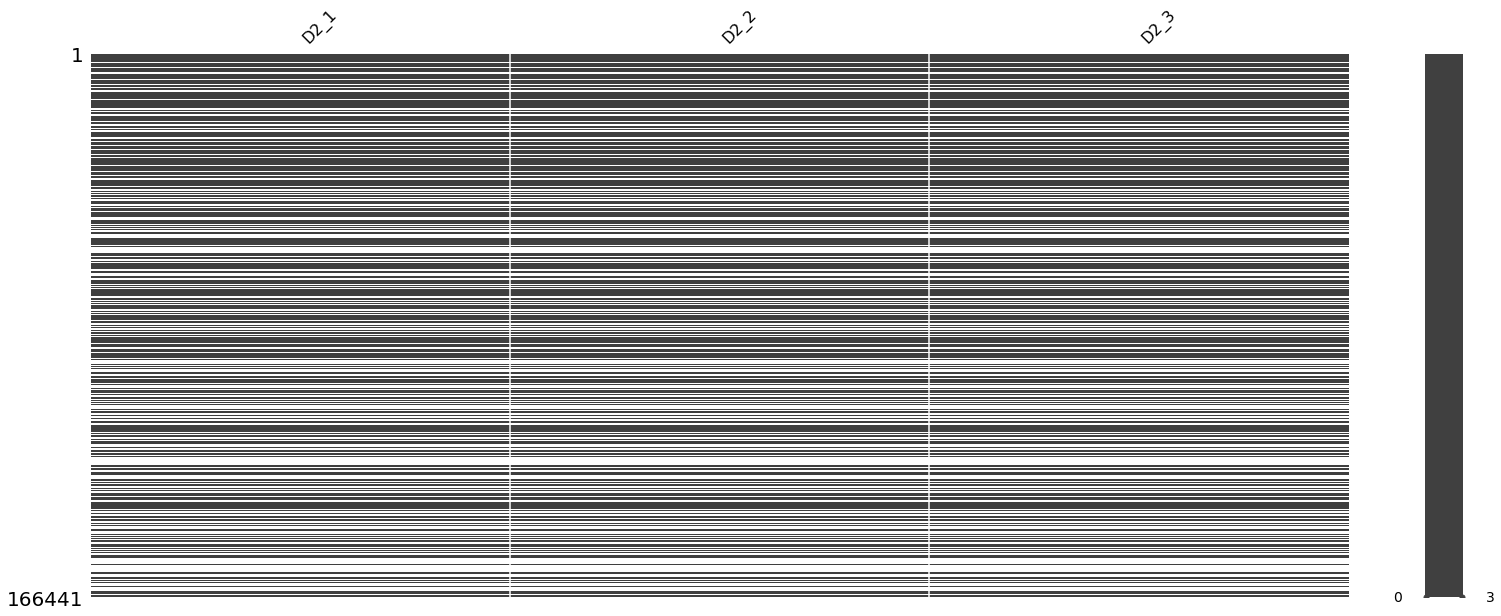

In [89]:
msno.matrix(df[['D2_1', 'D2_2', 'D2_3']])

<AxesSubplot:>

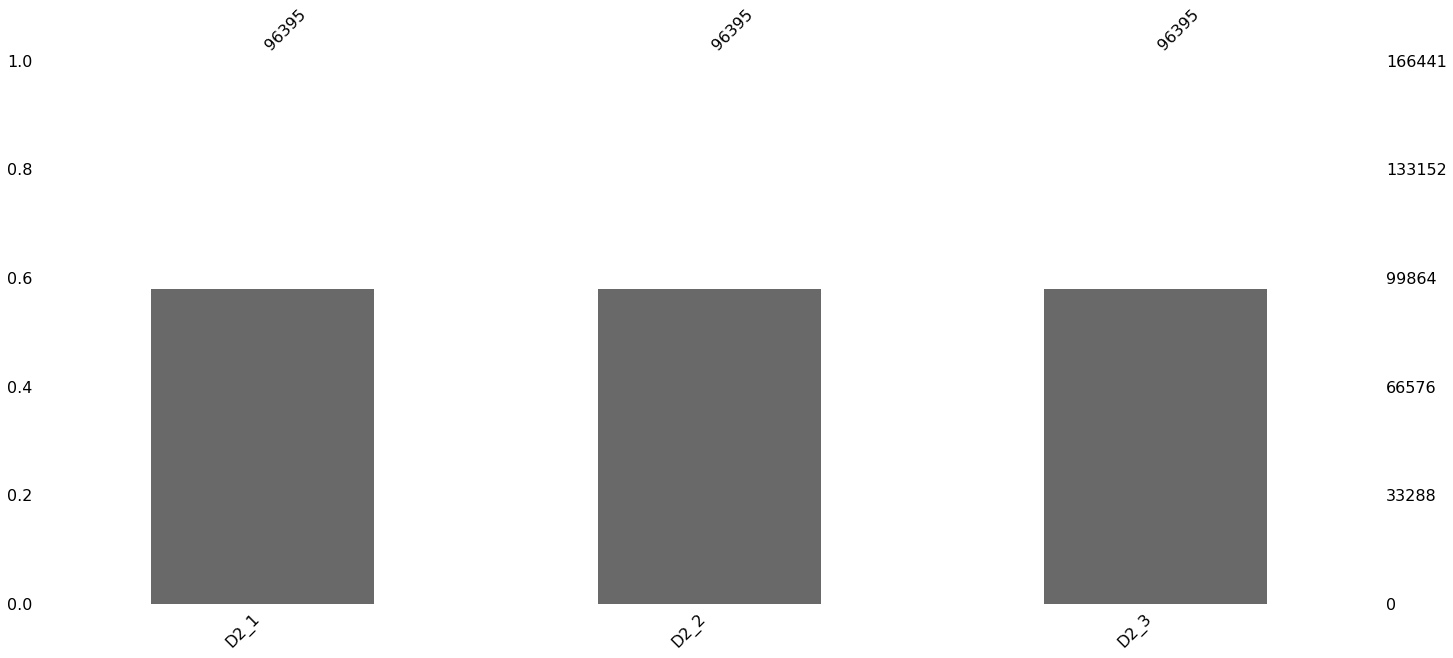

In [90]:
msno.bar(df[['D2_1', 'D2_2', 'D2_3']])

### D2_1

In [91]:
df['D2_1'].value_counts()

10.0    19157
8.0     15920
7.0     12300
5.0     12120
9.0      9569
6.0      7798
0.0      5802
4.0      4913
3.0      4194
2.0      3177
1.0      1282
99.0      163
Name: D2_1, dtype: int64

In [92]:
df['D2_1'].isnull().value_counts() #O resultado será o mesmo para as duas outras colunas

False    96395
True     70046
Name: D2_1, dtype: int64

In [93]:
df['D2_1'].describe()

count    96395.000000
mean         6.790248
std          4.755004
min          0.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         99.000000
Name: D2_1, dtype: float64

In [94]:
d2_1_mean = df['D2_1'].describe()['mean']
d2_1_filled = df['D2_1'].fillna(d2_1_mean)
d2_1_filled = d2_1_filled.apply(lambda x: d2_1_mean if x == 99 else x)
d2_1_filled

0          4.000000
1          6.790248
2          4.000000
3         10.000000
4          6.000000
            ...    
166694    10.000000
166695     6.790248
166696     6.790248
166697     8.000000
166698    10.000000
Name: D2_1, Length: 166441, dtype: float64

In [95]:
df['D2_1'] = d2_1_filled
df['D2_1'].describe()

count    166441.000000
mean          6.699945
std           2.181649
min           0.000000
25%           6.790248
50%           6.790248
75%           8.000000
max          10.000000
Name: D2_1, dtype: float64

In [96]:
d2_1_groupby = df.groupby(['D2_1'], as_index=False).mean()

alt.Chart(d2_1_groupby).mark_line().encode(
    x = 'D2_1',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'D2_1']
).properties(
    title = 'Média de J1 por nota D2_1'
).interactive()

alt.Chart(...)

### D2_2

In [97]:
df['D2_2'].value_counts()

8.0     16539
10.0    16473
7.0     12825
5.0     12164
9.0      9572
6.0      8174
0.0      6427
4.0      5032
3.0      4390
2.0      3298
1.0      1291
99.0      210
Name: D2_2, dtype: int64

In [98]:
df['D2_2'].describe()

count    96395.000000
mean         6.689185
std          5.180937
min          0.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         99.000000
Name: D2_2, dtype: float64

In [99]:
d2_2_mean = df['D2_2'].describe()['mean']
d2_2_filled = df['D2_2'].fillna(d2_2_mean)
d2_2_filled = d2_2_filled.apply(lambda x: d2_2_mean if x == 99 else x)
d2_2_filled

0          6.000000
1          6.689185
2          9.000000
3         10.000000
4          5.000000
            ...    
166694    10.000000
166695     6.689185
166696     6.689185
166697     6.000000
166698     8.000000
Name: D2_2, Length: 166441, dtype: float64

In [100]:
df['D2_2'] = d2_2_filled
df['D2_2'].describe()

count    166441.000000
mean          6.572716
std           2.186469
min           0.000000
25%           6.689185
50%           6.689185
75%           8.000000
max          10.000000
Name: D2_2, dtype: float64

In [101]:
d2_2_groupby = df.groupby(['D2_2'], as_index=False) \
                 .mean()

alt.Chart(d2_2_groupby).mark_line().encode(
    x = 'D2_2',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'D2_2']
).properties(
    title = 'Média de J1 por nota D2_2'
).interactive()

alt.Chart(...)

### D2_3

In [102]:
df['D2_3'].value_counts()

10.0    17310
8.0     16442
7.0     12696
5.0     11946
9.0      9468
6.0      8094
0.0      6286
4.0      4969
3.0      4272
2.0      3189
1.0      1406
99.0      317
Name: D2_3, dtype: int64

In [103]:
df['D2_3'].describe()

count    96395.000000
mean         6.835137
std          6.023894
min          0.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         99.000000
Name: D2_3, dtype: float64

In [104]:
d2_3_mean = df['D2_3'].describe()['mean']
d2_3_filled = df['D2_3'].fillna(d2_3_mean)
d2_3_filled = d2_3_filled.apply(lambda x: d2_3_mean if x == 99 else x)
d2_3_filled

0          5.000000
1          6.835137
2          5.000000
3         10.000000
4          6.000000
            ...    
166694     8.000000
166695     6.835137
166696     6.835137
166697     5.000000
166698    10.000000
Name: D2_3, Length: 166441, dtype: float64

In [105]:
df['D2_3'] = d2_3_filled
df['D2_3'].describe()

count    166441.000000
mean          6.659601
std           2.192432
min           0.000000
25%           6.835137
50%           6.835137
75%           8.000000
max          10.000000
Name: D2_3, dtype: float64

In [106]:
d2_3_groupby = df.groupby(['D2_3'], as_index=False).mean()

alt.Chart(d2_3_groupby).mark_line().encode(
    x = 'D2_3',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'D2_3']
).properties(
    title = 'Média de J1 por nota D2_3'
).interactive()

alt.Chart(...)

## E1

As colunas E1 não contém valores nulos, mas contém missing data codificadas como 99.

### 5.5.1 E1_1

In [107]:
df['E1_1'].value_counts()

10    42125
8     28683
5     20523
7     19475
9     15734
6     11671
0     11070
4      5645
3      4857
2      4124
1      1594
99      940
Name: E1_1, dtype: int64

In [108]:
df.query('E1_1 != 99')['E1_1'].describe()

count    165501.000000
mean          6.938200
std           2.903593
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: E1_1, dtype: float64

In [109]:
e1_1_mean = df.query('E1_1 != 99')['E1_1'].describe()['mean']
e1_1 = df['E1_1']
e1_1 = e1_1.apply(lambda x: e1_1_mean if x == 99 else x)
e1_1

0          8.0
1         10.0
2          8.0
3         10.0
4         10.0
          ... 
166694     8.0
166695    10.0
166696     8.0
166697     6.0
166698    10.0
Name: E1_1, Length: 166441, dtype: float64

In [110]:
df['E1_1'] = e1_1
df['E1_1'].describe()

count    166441.000000
mean          6.938200
std           2.895382
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: E1_1, dtype: float64

In [111]:
e1_1_groupby = df.groupby(['E1_1'], as_index=False).mean()

alt.Chart(e1_1_groupby).mark_line().encode(
    x = 'E1_1',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'E1_1']
).properties(
    title = 'Média de J1 por nota E1_1'
).interactive()

alt.Chart(...)

### 5.5.2 E1_2

In [112]:
df['E1_2'].value_counts()

10    41687
8     24440
5     19974
7     16982
0     16414
9     14453
6     10952
4      6830
3      6229
2      5526
1      2318
99      636
Name: E1_2, dtype: int64

In [113]:
df.query('E1_2 != 99')['E1_2'].describe()

count    165805.000000
mean          6.551672
std           3.203901
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          10.000000
Name: E1_2, dtype: float64

In [114]:
e1_2_mean = df.query('E1_2 != 99')['E1_2'].describe()['mean']
e1_2 = df['E1_2']
e1_2 = e1_2.apply(lambda x: e1_2_mean if x == 99 else x)
e1_2

0         10.0
1         10.0
2         10.0
3          0.0
4         10.0
          ... 
166694    10.0
166695    10.0
166696    10.0
166697     7.0
166698     8.0
Name: E1_2, Length: 166441, dtype: float64

In [115]:
df['E1_2'] = e1_2
df['E1_2'].describe()

count    166441.000000
mean          6.551672
std           3.197773
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          10.000000
Name: E1_2, dtype: float64

In [116]:
e1_2_groupby = df.groupby(['E1_2'], as_index=False).mean()

alt.Chart(e1_2_groupby).mark_line().encode(
    x = 'E1_2',
    y = alt.Y('J1', title='Média J1'),
    tooltip = ['J1', 'E1_2']
).properties(
    title = 'Média de J1 por nota E1_2'
).interactive()

alt.Chart(...)

## Colunas F

<AxesSubplot:>

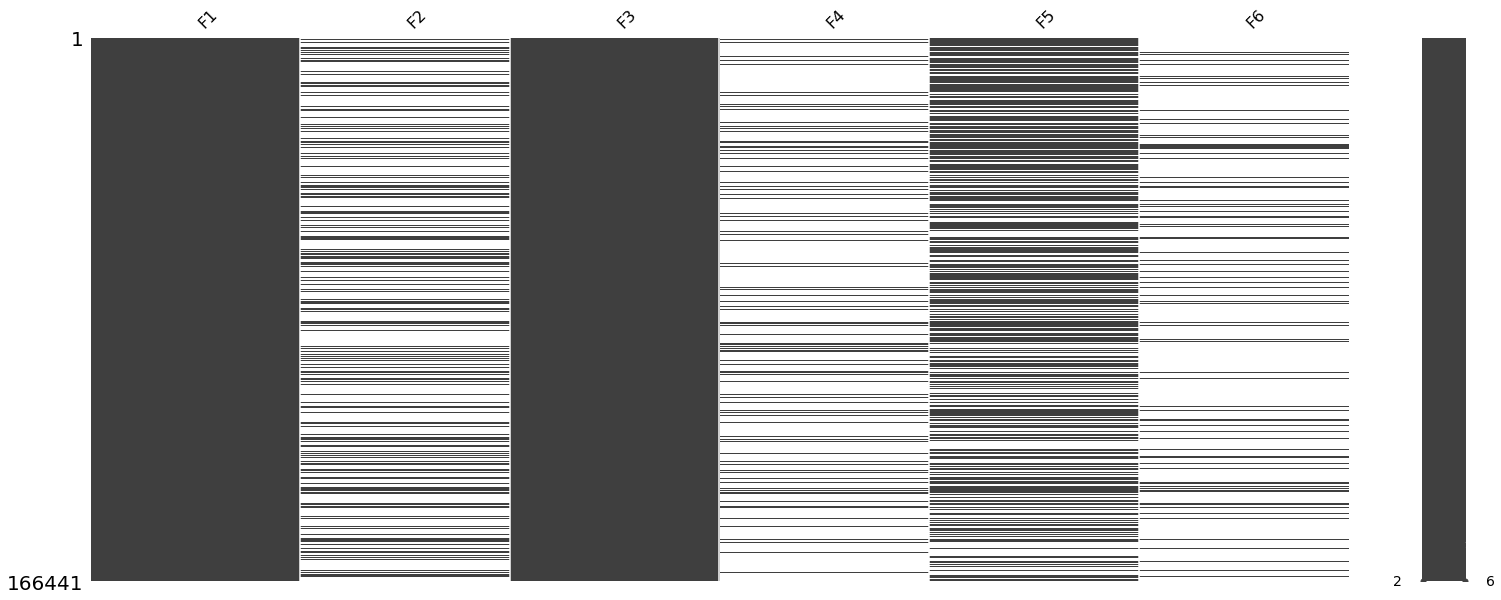

In [117]:
msno.matrix(df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']])

<AxesSubplot:>

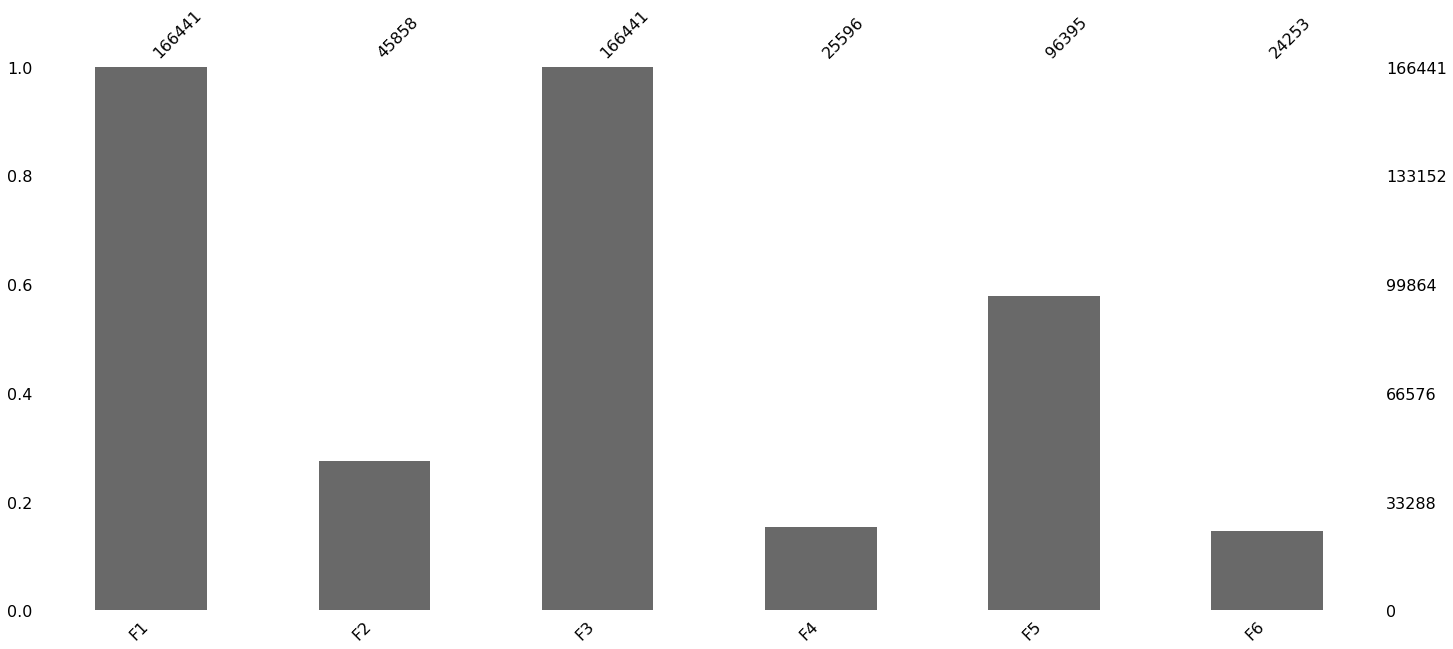

In [118]:
msno.bar(df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']])

As colunas F2, F4 e F6 contém mais de 50% de missing data, portanto vamos removê-las.

In [119]:
df = df.drop(columns=['F2', 'F4', 'F6'])
df.head()

,J1,B1_1,B1_2,C1_1,C1_2,D1,D2_1,D2_2,D2_3,E1_1,...,F5,genero,renda,contribuintes_renda,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
0,4,7.0,7.0,10.0,10.0,1,4.000000,6.000000,5.000000,8.0,...,2.0,1,1.000000,3,1,0,0,0,0,0
1,10,10.0,10.0,10.0,10.0,2,6.790248,6.689185,6.835137,10.0,...,NaN,1,1.000000,1,0,0,1,0,0,0
2,10,10.0,10.0,7.0,8.0,1,4.000000,9.000000,5.000000,8.0,...,2.0,1,1.988197,2,0,0,0,0,1,0
3,10,10.0,10.0,10.0,10.0,1,10.000000,10.000000,10.000000,10.0,...,2.0,1,1.000000,1,0,0,0,0,0,1
4,9,10.0,10.0,0.0,0.0,1,6.000000,5.000000,6.000000,10.0,...,2.0,0,1.000000,2,0,0,0,0,0,1


In [120]:
df['F1'].value_counts()

2    120583
1     45858
Name: F1, dtype: int64

In [121]:
df['F3'].value_counts()

2    140845
1     25596
Name: F3, dtype: int64

As colunas F1 e F3 não contém missing data, então não precisamos limpá-las.

A coluna F5 descreve se o usuário entrou em contato com a operadora para falar sobre problemas na internet 3G/4G nos 6 meses anteriores à pesquisa. Porém, só é preenchida para aqueles que responderam SIM para a pergunta D1.

Portanto, podemos preencher as entradas com missing data com NÃO, que é igual a 2.

In [122]:
df['F5'] = df['F5'].fillna(2)
df['F5'].value_counts()

2.0    142188
1.0     24253
Name: F5, dtype: int64

# Nota final

O último passo é agrupar a nota final em baixa, se menor que 8, ou alta, se maior ou igual a 8.

In [123]:
new_j1 = df["J1"].apply(lambda x: 'baixa' if x < 8 else 'alta')
new_j1

0         baixa
1          alta
2          alta
3          alta
4          alta
          ...  
166694     alta
166695     alta
166696    baixa
166697     alta
166698     alta
Name: J1, Length: 166441, dtype: object

In [124]:
df["nota"] = new_j1

In [125]:
df = df.drop(columns=['J1'])

In [126]:
df.to_csv("bd.csv")